# Permutation Testing

Testing to assure that the network is effectively fitting the data even in the presence of noisy features. 

In [1]:
import sys

sys.path.append('..')

Loading `regression_test.py` into memory.

In [24]:
import ann_inference.testing.regression_test as reg
import ann_inference.data.arrow_helper as ah
import ann_inference.data.load_data as ld
import numpy as np

Then we will generate a dataset for regression with very noisy features (only 10 are predictive out of 20) by calling `gen_regression` from `load_data`.

In [13]:
X, y = ld.gen_regression(10000, 20, 10)

In [14]:
model_data = ld.ModelData(X, y, 123, train_pct=0.8)

Then the regression test is initialized by calling `RegressionTester`. Then we will assign a path as `string` to write to when we perform multiple testing. Then the regression test is run by calling `reg_test.gen_test_datasets_permuted` which will write the results of the test to disk at the specified `path`.

In [8]:
reg_test = reg.RegressionTester(model_data, 24)

In [15]:
parquet_path = '../../parquet_store/regression_tests/12_11_2018/'

In [15]:
reg_test.gen_test_datasets_permuted(10, 500, 40, parquet_path, seed=None)

In [16]:
mse_dir, mse_perm = 'stat=mse', 'stat=permuted_mse'

Last, we'll read the files into a `DataFrame` object by calling `read_parquet_store`. We will then print out the first few records in each `DataFrame` to ensure the files were read in correctly. Then we will plot the average errors over each epoch for the permuted labels and actual mean squared errors.

In [17]:
mse_pd = ah.read_parquet_store(parquet_path + mse_dir)

In [18]:
permuted_pd = ah.read_parquet_store(parquet_path + mse_perm)

In [19]:
mse_pd['stat'] = 'mse'
permuted_pd['stat'] = 'permuted_mse'

In [20]:
mse_pd.head()

,id,epoch_num,mse,stat
0,9,0,51323.921875,mse
1,9,1,50771.597656,mse
2,9,2,49257.312500,mse
3,9,3,45126.781250,mse
4,9,4,35170.292969,mse


In [21]:
permuted_pd.head()

,id,epoch_num,mse,stat
0,2,0,51590.000000,permuted_mse
1,2,1,51614.000000,permuted_mse
2,2,2,51485.367188,permuted_mse
3,2,3,53002.375000,permuted_mse
4,2,4,56840.398438,permuted_mse


In [22]:
avg_perm_mse = permuted_pd.groupby(['epoch_num', 'stat'], as_index=False)['mse'].mean()
avg_mse = mse_pd.groupby(['epoch_num', 'stat'], as_index=False)['mse'].mean()

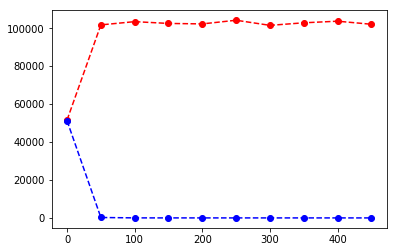

In [25]:
%matplotlib inline 

import matplotlib.pyplot as plt

np_avg_perm = avg_perm_mse.values
np_avg_mse = avg_mse.values

plt_idx = np.arange(0, np_avg_perm.shape[0], 50)

plt.plot(plt_idx, np_avg_perm[plt_idx, 2], 'r--o')
plt.plot(plt_idx, np_avg_mse[plt_idx, 2], 'b--o')
plt.show()